In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import requests
import io
from sklearn.decomposition import PCA

# Load data
url = 'https://www.dropbox.com/scl/fi/597krk57l3z7bpzm8h5bw/hapmap_small.pkl?rlkey=ry6l8dim6acepb3pnug54w9dx&dl=1'
response = requests.get(url)
dic_data = pickle.load(io.BytesIO(response.content))

df_geno = dic_data['geno']
df_ind = dic_data['ind']
df_snp = dic_data['snp']

In [7]:
df_snp

,chromosome,morgans,position,ref,alt
rs3131972,1,0.0,742584,G,A
rs1048488,1,0.0,750775,T,C
rs12562034,1,0.0,758311,G,A
rs4040617,1,0.0,769185,A,G
rs4970383,1,0.0,828418,C,A
...,...,...,...,...,...
rs2071414,1,0.0,8843299,T,G
rs2765507,1,0.0,8847699,T,C
rs2274971,1,0.0,8853736,C,T
rs12032347,1,0.0,8867650,C,T


In [6]:
df_ind

,sex,pop
NA06989,F,CEU
NA11891,M,CEU
NA11843,M,CEU
NA12341,F,CEU
NA06984,M,CEU
...,...,...
NA19140,F,YRI
NA18859,M,YRI
NA19119,M,YRI
NA19207,M,YRI


In [5]:
df_geno

,rs3131972,rs1048488,rs12562034,rs4040617,rs4970383,rs4475691,rs1806509,rs7537756,rs2340587,rs1110052,...,rs11582339,rs11121242,rs6677249,rs2038903,rs10864368,rs2071414,rs2765507,rs2274971,rs12032347,rs7539600
NA06989,1,1,1,1,1,2,1,2,0,0,...,1,1,2,2,1,1,1,1,1,2
NA11891,1,1,2,2,2,2,0,2,0,0,...,2,2,0,2,2,2,2,2,1,1
NA11843,2,2,2,2,2,2,0,2,0,0,...,0,0,2,0,0,2,0,2,2,2
NA12341,1,1,2,1,2,2,1,1,1,1,...,1,0,2,0,0,1,1,1,1,2
NA06984,2,2,1,2,1,1,1,1,1,1,...,2,2,2,2,2,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA19140,0,2,2,2,2,2,2,0,2,2,...,2,2,1,2,2,2,2,2,2,2
NA18859,0,0,2,1,0,2,1,2,1,1,...,2,2,1,2,2,2,2,2,2,2
NA19119,1,1,2,1,2,2,1,1,1,1,...,1,1,2,1,1,2,2,2,2,2
NA19207,1,1,2,1,2,2,0,2,2,2,...,2,2,2,2,2,2,2,2,2,2


### Task 1: what’s the allele frequency of rs10910034 in CEU and CHB?

In [3]:
for pop in ['CEU', 'CHB']:

    ind_select = df_ind['pop'] == pop
    v_geno = df_geno.loc[ind_select, 'rs10910034'].values

    # Compute allele frequency for each population
    #
    # Hints:
    # - Allele frequency = 0.5 * (average mutation per individual) because humans are diploid
    # - `v_geno` : # mutations for each individual in the given population
    # - Use `np.mean()` to compute the average of an array (e.g., `v_gene`)
    # - Store the result to `solution_af`

    ### Begin solution
    v_geno

    solution_af = np.mean(v_geno) * 0.5
    ### End solution


    print(pop, 'Allele frequency=%0.3f' % solution_af)

CEU Allele frequency=0.571
CHB Allele frequency=0.792


### Task 2: how well can rs10910034 separate CEU and CHB?

In [8]:
df_plot = df_geno[['rs10910034']]
df_plot = df_plot.join(df_ind['pop'])
df_plot = df_plot[df_plot['pop'].isin(['CEU', 'CHB'])]
df_plot

,rs10910034,pop
NA06989,2,CEU
NA11891,0,CEU
NA11843,1,CEU
NA12341,1,CEU
NA06984,0,CEU
...,...,...
NA18576,2,CHB
NA18582,2,CHB
NA18633,1,CHB
NA18637,1,CHB


<Axes: xlabel='rs10910034', ylabel='Count'>

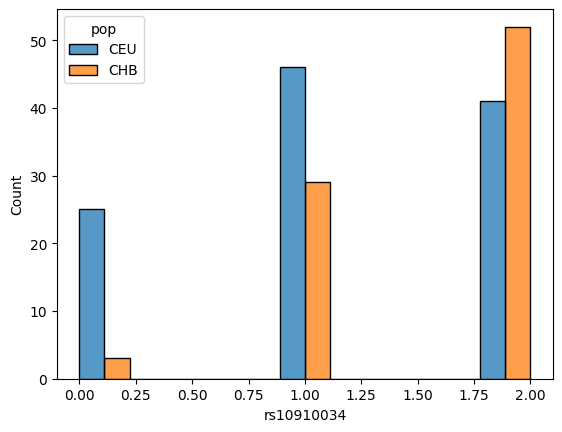

In [10]:
# Plot a histogram of mutation counts for CEU and CHB individuals.
#
# Hints:
# - Use sns.histplot(data=XXX, x=XXX, hue=XXX, multiple='dodge')
# - Set `data` to the plotting data (e.g., `df_plot`)
# - Set `x` to the x-value column (corresponding to the genotype)
# - Set `hue` to the column that determines the color (corresponding to the population)

### Begin solution
sns.histplot(data=df_plot, x=df_plot['rs10910034'], hue=df_plot['pop'], multiple='dodge') # Replace "XXX" to your code here
### End solution

In [15]:
df_geno.std()

,0
rs3131972,0.760144
rs1048488,0.697864
rs12562034,0.706657
rs4040617,0.653551
rs4970383,0.666209
...,...
rs2071414,0.817168
rs2765507,0.680948
rs2274971,0.817844
rs12032347,0.818943


In [16]:
df_geno.index

Index(['NA06989', 'NA11891', 'NA11843', 'NA12341', 'NA06984', 'NA12275',
       'NA06986', 'NA12272', 'NA07051', 'NA12400',
       ...
       'NA19131', 'NA19116', 'NA19127', 'NA18853', 'NA19171', 'NA19140',
       'NA18859', 'NA19119', 'NA19207', 'NA19099'],
      dtype='object', length=395)

### Task 3: PCA and all populations

<Axes: xlabel='PC1', ylabel='PC2'>

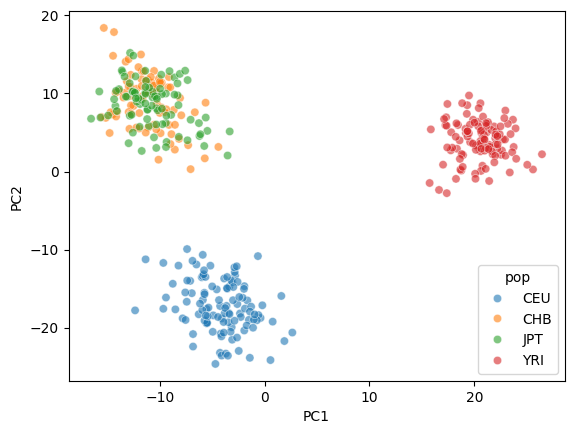

In [12]:
df_geno_std = (df_geno - df_geno.mean()) / df_geno.std()
df_score = pd.DataFrame(index=df_geno.index, columns=['PC1', 'PC2'])

# Apply PCA to df_geno_std and store PC scores in `df_score` columns ['PC1', 'PC2']
#
# Hints:
# - df_geno_std is a standardized genotype matrix (samples as rows, SNPs as columns)
# - Use PCA(n_components=2).fit(data).transform(data) to compute scores
# - The output is an [n_samples, 2] matrix representing PC1 and PC2

### Begin solution
temp_mat = PCA(n_components=2).fit(df_geno_std).transform(df_geno_std)
df_score['PC1'] = temp_mat[:, 0]
df_score['PC2'] = temp_mat[:, 1]
### End solution

df_plot = df_ind[['pop']]
df_plot = df_plot.join(df_score)
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='pop', alpha=0.6)

In [13]:
df_score['PC1']

,PC1
NA06989,-4.205851
NA11891,-4.084536
NA11843,-2.612046
NA12341,-2.354540
NA06984,-4.251422
...,...
NA19140,26.460154
NA18859,20.639765
NA19119,21.912252
NA19207,20.982804


In [14]:
df_score['PC2']

,PC2
NA06989,-20.749676
NA11891,-18.802314
NA11843,-16.959794
NA12341,-18.157030
NA06984,-17.211038
...,...
NA19140,2.219601
NA18859,5.215881
NA19119,1.180713
NA19207,4.096737
